# Web Scraping de `lazone.org` avec Selenium et Chrome

![lazone.png](lazone.png)

## Prérequis

Installer le dernière version de ChromeDriver : https://chromedriver.chromium.org/downloads. A noter qu'il faut avoir installé chrome, et qu'il faut choisir la version du driver qui correspond à notre version de chrome.

Installer selenium :

In [34]:
!pip install selenium

In [158]:
!pip install spacy
!python -m spacy download fr_core_news_sm
!pip install nltk

2021-03-15 14:45:15.645345: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-15 14:45:15.645384: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [212]:
#Importing packages
from selenium import webdriver
import pandas as pd
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Scraping

Les pages à scrapper sont les suivantes :

In [227]:
page_best_of = "https://www.lazone.org/articles/bestOf.html"
page_worst_of = "https://www.lazone.org/articles/worstOf.html"

Nous allons scraper les résumés des meilleurs (note > 8/10) et les pires (note < 1/10) textes du site `lazone.org`.

Nous enregisterons :
- le nom de l'auteur
- le titre de l'oeuvre
- la date
- le résumé

In [226]:
driver = webdriver.Chrome('C:/Users/utilisateur/chromedriver.exe')

On inspecte la page HTML du site choisi et on récupère les XPath grace à la fonction de Selenium `find_elements_by_xpath`.

In [232]:
def scrap_text(page):
    driver.get(page)
    list_of_texts = driver.find_elements_by_xpath('//*[@id="main"]/div/ol/li')

    df = pd.DataFrame(columns = ['Date', 'Title', 'Author','Abstract']) # creation d'un dataframe
    for i in range(1, len(list_of_texts)+1):

        #Extract date and abstract
        comment_element = driver.find_elements_by_xpath(f'//*[@id="main"]/div/ol/li[{i}]')
        comment = comment_element[0].text
        date = comment.split(") :")[0][-10:]
        abstract = comment.split(") :")[1]

        #Extract title
        title_element = driver.find_elements_by_xpath(f'//*[@id="main"]/div/ol/li[{i}]/a[1]')[0]
        title = title_element.text

        #Extract author 
        author_element = driver.find_elements_by_xpath(f'//*[@id="main"]/div/ol/li[{i}]/a[2]')[0]
        author = author_element.text

        #Adding references to the dataframe    
        df.loc[len(df)] = [date, title, author, abstract]
    return df

In [234]:
df_best = scrap_text(page_best_of)

In [235]:
df_worst = scrap_text(page_worst_of)

In [270]:
# retraitement de la date
df_best['Date'] = pd.to_datetime(df_best['Date'])
df_worst['Date'] = pd.to_datetime(df_worst['Date'])

##### Résultats

In [271]:
df_best.head(10)

,Date,Title,Author,Abstract
0,2015-01-12,Passer la trentaine,CTRL X,On tient un chef d'œuvre ! Dans le bourbier d...
1,2017-07-20,La vie est un chef d'oeuvre d'humour juif,CTRL X,Contribution extraordinaire de notre Grand In...
2,2017-09-13,L'Anémone Couronnée,Clacker,Avec la première contribution à l'appel à tex...
3,2005-07-24,Le texte dont je suis le héros,Nounourz,(Texte remanié et rallongé) Ce mastodonte est...
4,2003-11-21,Arch-nemesis,nihil,(Article initialement paru le 01/11/03 sous l...
5,2006-05-16,En route vers le clochard ! (venez je vous emm...,Obn,L'écriture inventive et fluide d'Obn est très...
6,2014-01-08,En Plein cœur. PAN! Pas ailleurs. (1),Valstar Karamzin,Quand on a l'impudence de poster sur la Zone ...
7,2015-08-19,Balistique - Version 2,Narak,à l'occasion de la sortie du N°2 de LRQTP pré...
8,2016-06-12,Attends ta cule à la récré,Castor tillon,Castor Tillon est de retour sur la Zone. Long...
9,2016-10-12,Dark Terrelya,LePouilleux,Ce texte splendide de LePouilleux prend pour ...


In [272]:
df_worst.head(10)

,Date,Title,Author,Abstract
0,2006-07-04,"? rire, la mort ?",Aure,Ce texte m'a fait me demander si je devais pa...
1,2002-01-21,Fin de soirée,Amanite,Retranscription d'un tas de conneries écrites...
2,2002-08-05,Erections,Fresbee,Réaction de Fresbee au résultat du second tou...
3,2004-02-07,Crying like a diplodocus,Narak,"Un texte de chanson imaginaire en anglais, en..."
4,2007-08-26,Jolie fille mais dangeureuse,Shell,Enorme. Ca faisait longtemps qu'on avait pas ...
5,2009-09-13,Pulsion,Reteex,Voilà un concurrent super sérieux pour le con...
6,2017-01-13,"Le changement ? Une prière, une tape sur le cu...",Le Docteur Burz,Après les remarques de M. Burz sur l'organisa...
7,2012-10-23,MORBIDE ANTAGONISME,Abysmal,"Ici, vous pourrez admirer de vos yeux ébahis ..."
8,2002-01-03,A mort les tarés,M. Goret,"Le premier article de M. Goret, complètement ..."
9,2002-01-28,?,Shirow,?


In [273]:
df_best['Abstract'][5] #test

" L'écriture inventive et fluide d'Obn est très agréable et suffit à nous faire avaler ce pavé sans sourciller. Bizarre parce qu'il se passe pas grand-chose et que ça patauge dans la confusion mentale, pourtant ça se bouffe tout seul. Cette tranche de vie tordue en hôpital psychiatrique est un régal à tous points de vue, à la fois désespérée et amusante. Les tarés cotoient les suicidaires, tous aussi sympathiques les uns que les autres. Excellent."

## Retraitement des données

In [257]:
import re
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('french') + ['texte', 'plus', 'bien', 'tout', 'peu', 'tres', 'ca', 'fait', 'meme', 'aussi', 'sans', 'cette', 'si', 'donc', 'auteur', 'comme']


def pretraitement(text):
    text = text.lower() #lower case
    text = ''.join((c for c in unicodedata.normalize('NFD', text) 
                    if unicodedata.category(c) != 'Mn')) #
    
    text = re.sub('\[[^]]*\]', ' ', text)
    text = re.sub('[^a-zA-Z]', ' ', text)

    words = text.split(" ") # on remplace le tokenizer par un split, on obtient la liste des mots 
    words = list(filter(None, words))

    words = [word for word in words if word not in stop_words] #suppression des mots vides
    text = " ".join(words)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [258]:
df['Abstract'][0]

" On tient un chef d'œuvre ! Dans le bourbier de bienpensance, bienséance et patriotisme de pacotille ambiants, CTRL X vient nous donner un bon gros coup de poing littéraire dans le ventre et nous sortir la tronche de nos carnets de condoléances désespérants. Ce formidable périple urbain d'un papa narrateur accompagné de son bambin bipolaire à l'ouest, entrecoupé de zones de turbulences scénaristiques improbables, en cheat mode lousdé sup, est exactement le cocktail médicamenteux narratif dont tu as absolument besoin pour sortir du coma d'idées bas de gamme dans lequel tu sais parfaitement que l'actualité pourrie t'a fait plonger. Toi qui t'étais promis de ne jamais subir son immonde diktat. Plus drôle, tu meurs catapulté à l'infini par tes propres zygomatiques."

In [259]:
print(pretraitement(df['Abstract'][0]))

tient chef uvre bourbier bienpensance bienseance patriotisme pacotille ambiants ctrl x vient donner bon gros coup poing litteraire ventre sortir tronche carnets condoleances desesperants formidable periple urbain papa narrateur accompagne bambin bipolaire a ouest entrecoupe zones turbulences scenaristiques improbables cheat mode lousde sup exactement cocktail medicamenteux narratif dont absolument besoin sortir coma idees bas gamme lequel sais parfaitement actualite pourrie a plonger etais promis jamais subir immonde diktat drole meurs catapulte a infini propres zygomatiques


In [260]:
best_text = str()
for i in df_best.index :
    best_text += pretraitement(df_best['Abstract'].iloc[i])

In [261]:
worst_text = str()
for i in df_worst.index :
    worst_text += pretraitement(df_worst['Abstract'].iloc[i])

In [262]:
wcloud_best = WordCloud(max_font_size=80).generate(best_text)
wcloud_worst = WordCloud(max_font_size=80).generate(worst_text)

Text(0.5, 1.0, 'nuage de mots sur le Best-of')

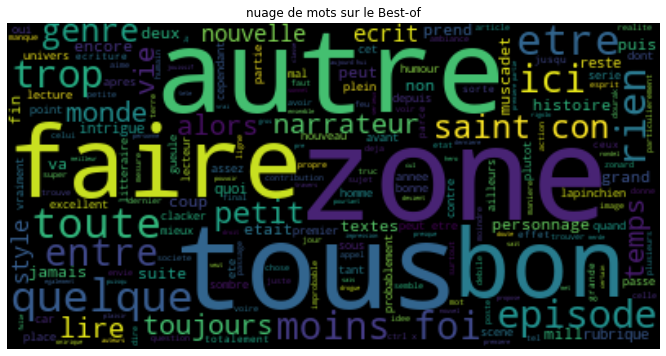

In [263]:
plt.figure(figsize=(12,6))
plt.imshow(wcloud_best, interpolation='bilinear')
plt.axis("off")
plt.title("nuage de mots sur le Best-of")

Text(0.5, 1.0, 'nuage de mots sur le worst-of')

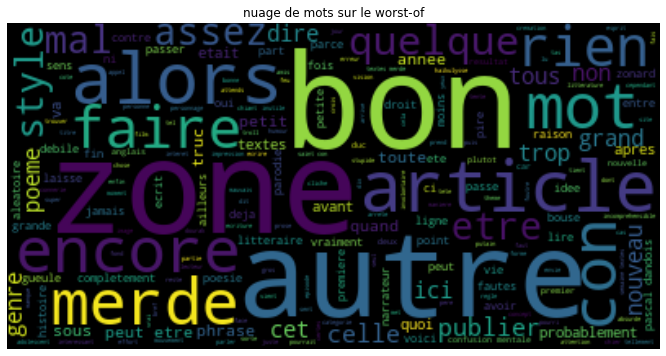

In [264]:
plt.figure(figsize=(12,6))
plt.imshow(wcloud_worst, interpolation='bilinear')
plt.axis("off")
plt.title("nuage de mots sur le worst-of")

In [274]:
# sauvegarde au format csv pour import mysql
df_best.to_csv('best_abstracts.csv') 
df_worst.to_csv('worst_abstracts.csv')

## Autres visualisations

In [275]:
import seaborn as sns

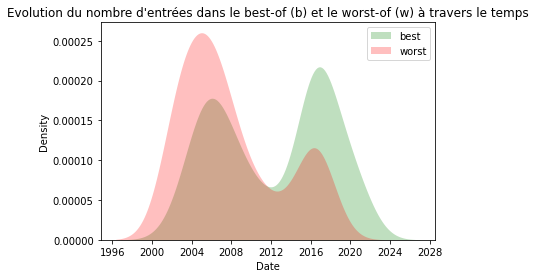

In [375]:
sns.kdeplot(data=df_best, x="Date", fill=True, linewidth=0, color="green")
sns.kdeplot(data=df_worst, x="Date", fill=True, linewidth=0, color="red")
plt.title("Evolution du nombre d'entrées dans le best-of (b) et le worst-of (w) à travers le temps")
plt.legend(["best","worst"])
plt.show()

In [359]:
pires = (df_worst.Author.value_counts())
print("10 pires auteurs") 
print(pires[:10])
meilleurs = (df_best.Author.value_counts())
print("10 meilleurs auteurs") 
print(meilleurs[:10])
print("Auteurs dans les deux listes")
print(list(set(meilleurs.index) & set(pires.index)))

10 pires auteurs
HaiKulysse             6
pascal dandois         6
Le Duc                 5
Zone Inc.              5
Amanite                3
Narak                  3
Arkanya                3
Shirow                 3
Khalid EL Morabethi    3
Lol47                  2
Name: Author, dtype: int64
10 meilleurs auteurs
nihil                23
Dourak Smerdiakov    20
Lapinchien           20
CTRL X               18
Clacker              18
Mill                 16
Muscadet             14
Glaüx-le-Chouette    11
Valstar Karamzin      6
Lourdes Phalanges     6
Name: Author, dtype: int64
Auteurs dans les deux listes
['Erreur', 'LePouilleux', 'Konsstrukt', 'Kirunaa', 'Lapinchien', 'Arkanya', 'nihil', 'Lourdes Phalanges', 'Wilhelm', 'Tulia', 'Glaüx-le-Chouette', 'pascal dandois', 'Narak', 'HaiKulysse']


C:\Users\utilisateur\anaconda3\envs\mypy36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


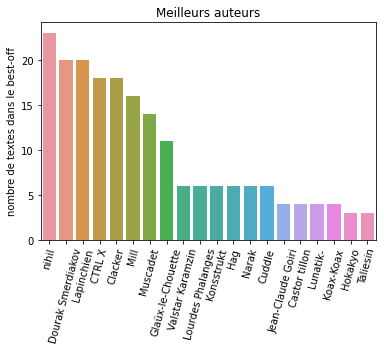

In [363]:
head = meilleurs.sort_values(ascending=False).head(20)
sns.barplot(head.index, head.values)
plt.xticks(rotation=75)
plt.title("Meilleurs auteurs")
plt.ylabel("nombre de textes dans le best-off")
plt.show()

C:\Users\utilisateur\anaconda3\envs\mypy36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


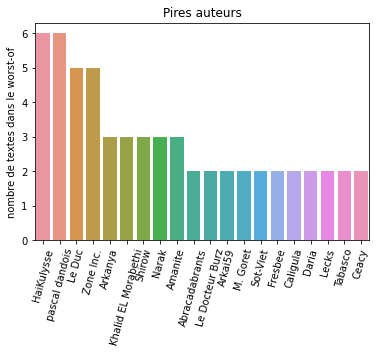

In [362]:
head = pires.sort_values(ascending=False).head(20)
sns.barplot(head.index, head.values)
plt.xticks(rotation=75)
plt.title("Pires auteurs")
plt.ylabel("nombre de textes dans le worst-of")
plt.show()

C:\Users\utilisateur\anaconda3\envs\mypy36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


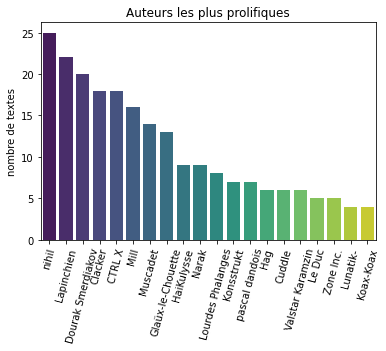

In [358]:
head = ecrivains.sort_values(ascending=False).head(20)
sns.barplot(head.index, head.values, palette="viridis")
plt.xticks(rotation=75)
plt.title("Auteurs les plus prolifiques")
plt.ylabel("nombre de textes")
plt.show()